# Business Understanding
Although there was some element of luck involved in surviving the sinking, some factors may infect the result, for example, age.
In this challange, we are asked to build a predictive model to predict which group of passengers are more likely to survived.

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

### Statistical Summaries

In [2]:
data_train = pd.read_csv("/Users/mira/Projects/Kaggle/Tatanic/train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above information, we have:
1. There are 891 passengers with 12 features (Passenger id, Survived or not, Passenger class, etc.)
2. Some information are missing, for example, we only have 714 Age data, and 204 Cabin data.
3. There are approximately 0.383838 passengers survived.
4. Most passenger lived in 2 or 3 class.
5. The average age of all passengers is 29.699118
...

### Data Visulization

To make the relationship among different attributes more clear, use the plots.

In [5]:
import matplotlib.pyplot as plt

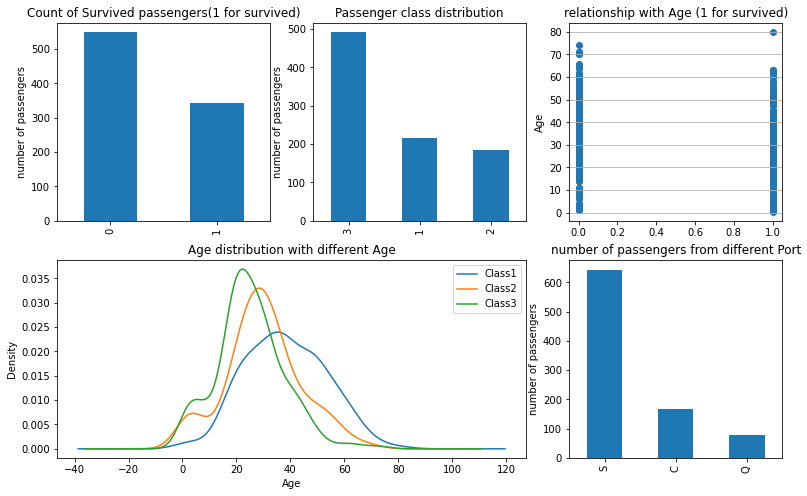

In [6]:
fig = plt.figure(figsize=(13,8))
fig.set(alpha = 1)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind = "bar")
plt.title(u"Count of Survived passengers(1 for survived)")
plt.ylabel(u"number of passengers")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind = "bar")
plt.title(u"Passenger class distribution")
plt.ylabel(u"number of passengers")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"Age")
plt.grid(b=True, which="major", axis="y")
plt.title(u"relationship with Age (1 for survived)")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind = "kde")
data_train.Age[data_train.Pclass == 2].plot(kind = "kde")
data_train.Age[data_train.Pclass == 3].plot(kind = "kde")
plt.xlabel(u"Age")
plt.ylabel(u"Density")
plt.title(u"Age distribution with different Age")
plt.legend((u"Class1", u"Class2", u"Class3"), loc = "best")

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind = "bar")
plt.title(u"number of passengers from different Port")
plt.ylabel(u"number of passengers")
plt.show()

From above plots, we have:
1. Only less than 350 passenger survived. the number is less than the half.
2. Most passengers are in Class 3. 
3. from the last plot at (0,2), we cannot find the relationship between the Age and Survived.
4. Class 3 passengers are younger than Class 2 passengers, and Class 2 passengers are younger than Class 1 passengers.
5. Number of passengers embarked at S, C, Q are decending, and over 600 passengers embarked at S.

__Second Thoughts:__
1. whether that a passenger survived is related to Cabin and Pclass, which might related to the wealth level.
2. whether that a passenger survived is related to Age and Cabin
3. whether that a passenger survived is related to the port that one embarked.

<Figure size 432x288 with 0 Axes>

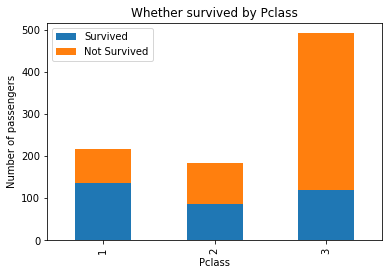

In [7]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not Survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Pclass")
plt.xlabel(u"Pclass") 
plt.ylabel(u"Number of passengers") 

plt.show()

From the above plot, we can easily see that the porpotion of survived passenger/not survived passenger is decreasing from class 1 to class 3. Thus, we can conclude that survival of the passenger is related to the Passenger class. 

<Figure size 432x288 with 0 Axes>

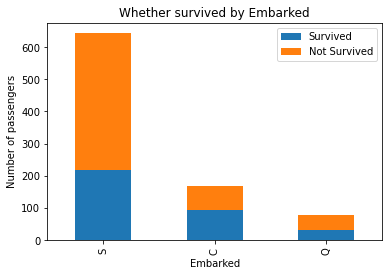

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)

Embarked_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Embarked_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Embarked_1, u'Not Survived':Embarked_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Embarked")
plt.xlabel(u"Embarked") 
plt.ylabel(u"Number of passengers") 

plt.show()

The ralationship between Embarked and Survived is not clear.

<Figure size 432x288 with 0 Axes>

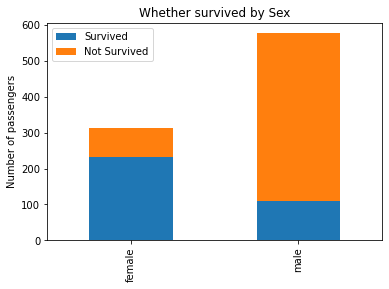

In [9]:
fig = plt.figure()
fig.set(alpha=0.2)

Sex_0 = data_train.Sex[data_train.Survived == 0].value_counts()
Sex_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Sex_1, u'Not Survived':Sex_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Whether survived by Sex")
plt.ylabel(u"Number of passengers")
plt.show()

From the above plot, we can easily see that female are more likely to survive.

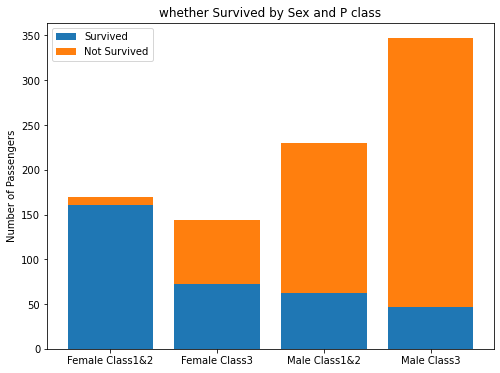

In [10]:
fig = plt.figure(figsize=(8,6))
fig.set(alpha = 0.2)

Female_c12 = data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts()
Female_c3 = data_train.Survived[data_train.Sex == "female"][data_train.Pclass == 3].value_counts()
Male_c12 = data_train.Survived[data_train.Sex == "male"][data_train.Pclass != 3].value_counts()
Male_c3 = data_train.Survived[data_train.Sex == "male"][data_train.Pclass == 3].value_counts()
df=pd.DataFrame({u'Female Class1&2':Female_c12, u'Female Class3':Female_c3, u'Male Class1&2':Male_c12, u'Male Class3':Male_c3})
x = ["Female Class1&2", "Female Class3", "Male Class1&2", "Male Class3"]
plt.bar(x, df.loc[1])
plt.bar(x, df.loc[0], bottom=df.loc[1])
plt.legend(["Survived", "Not Survived"])
plt.title(u"whether Survived by Sex and P class")
plt.ylabel(u"Number of Passengers")
plt.show()

# Data Preparation
First of all, let see the missing data from Age and Cabin:
- __Cabin__: Accroding to the existence of Cabin data, we sort it into two groups: Cabin_yes, Cabin_no.
- __Age__: use sklearn random forest to estimate the missing age value.

In [12]:
from sklearn.ensemble import RandomForestRegressor
 
### use RandomForestClassifier to estimate the missing age value
def set_missing_ages(df):
    
    # Put all existing numerical features into Random Forest Regression
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # sort all passengers into two groups: KnownAge and UnknownAge
    known_age = age_df[age_df.Age.notnull()].to_numpy()
    unknown_age = age_df[age_df.Age.isnull()].to_numpy()

    y = known_age[:, 0]
    X = known_age[:, 1:]

    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # estimate the missing Age Value with the model
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,No,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.185117,1,2,W./C. 6607,23.4500,No,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,Yes,C


Then we need to turn the categorical feature into numerical feature by get_dummies, then we will get the dummiy values which are an explanatory binary variable that equals 1 if a certain categorical effect is present and equals 0 is not.

In [13]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0
887,888,1,19.000000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0
888,889,0,16.185117,1,2,23.4500,1,0,0,0,1,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0


Also, we can see that some features (Age and Fare) have a wide range. We also need to perform feature scaling as Logistic Model is very sensitive to the range of data points.

In [31]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df[['Age']])
df['Age_scaled'] = scaler.fit_transform(df[['Age']], age_scale_param)
fare_scale_param = scaler.fit(df[['Fare']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']], fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561377,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613173,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267740,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392945,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392945,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,0,0,1,0,1,0,1,0,-0.194330,-0.386671
887,888,1,19.000000,0,0,30.0000,0,1,0,0,1,1,0,1,0,0,-0.781606,-0.044381
888,889,0,16.185117,1,2,23.4500,1,0,0,0,1,1,0,0,0,1,-0.988244,-0.176263
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0,0,1,1,0,0,-0.267740,-0.044381


# Logistic Regression

In [34]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.to_numpy()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X, y)
    
clf

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

In [35]:
X.shape

(891, 14)